In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Read CSV through Pandas
filepath = './train_data/features-0400-0415.csv'
data = pd.read_csv(filepath)

In [2]:
# Leave data with the following headings only
data = data[['vehicle_id', 'lane', 'frame', 'x_position', 'y_position', 'theta',
        'velocity', 'd0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']]
data_np = data.values.astype(np.float32)        # convert to numpy

In [3]:
# Number of data
num_data = data_np.shape[0]

# Get unique car-id
car_id_unique = np.unique(data_np[:,0])
num_car_unique = car_id_unique.shape[0]

# Traj parameters
H_prev = 15
H_post = 15
Hmin_prev = 7;
Hmin_post = 7;

indexes_info = np.array([0,1,2]) # indexes of info : 'vehicle_id', 'lane', 'frame'
dim_info = indexes_info.shape[0] # dimension of info
indexes_p = np.array([3,4,5])    # indexes of position
dim_p = indexes_p.shape[0]       # dimension of position
indexes_f = np.array([7,8,9,10,11,12,13])  # indexes of feature
dim_f = indexes_f.shape[0]       # dimension of features

info_data = np.zeros((num_data,dim_info))
p_data = np.zeros((num_data,dim_p))
f_data = np.zeros((num_data,dim_f))
prevTraj_data = np.zeros((num_data,dim_p*H_prev))
postTraj_data = np.zeros((num_data,dim_p*H_post))
cnt_data = 0

display_interval = 50

for nidx_i in range(0,num_car_unique):
    if(nidx_i % display_interval == 0):
        print("car_id: {:d}/{:d}".format(nidx_i,num_car_unique))
    
    idx_found = np.where( data_np[:,0] == nidx_i )
    len_idx_found = idx_found[0].shape[0]
    data_np_found = data_np[idx_found[0],:]
    if(len_idx_found > (Hmin_prev + Hmin_post)):
        for nidx_t in range(Hmin_prev,(len_idx_found-Hmin_post)):
            info_cur_init = data_np_found[nidx_t,indexes_info]
            p_cur_init = data_np_found[nidx_t,indexes_p]
            f_cur_init = data_np_found[nidx_t,indexes_f]
            
            # Set prev-trajectory
            prevTraj_tmp = np.zeros((dim_p,H_prev))
            H_prev_tmp = np.min([H_prev,nidx_t])
            cnt_prev_tmp = 0
            p_cur = p_cur_init
            for nidx_tt in range(1,H_prev_tmp+1):
                p_next = data_np_found[nidx_t-nidx_tt,indexes_p]
                cnt_prev_tmp = cnt_prev_tmp + 1
                prevTraj_tmp[:,cnt_prev_tmp-1] = p_next - p_cur
                p_cur = p_next
                
            if(cnt_prev_tmp < H_prev):
                remain_tmp = H_prev - cnt_prev_tmp
                indexes_remain = range(cnt_prev_tmp,H_prev)
                prev_Traj_tmp_last = np.reshape(prevTraj_tmp[:,cnt_prev_tmp-1],(dim_p,1))
                prevTraj_tmp[:,indexes_remain] = np.tile(prev_Traj_tmp_last,(1,remain_tmp))
                
            prevTraj_tmp_vector = np.reshape(prevTraj_tmp,H_prev*dim_p)
            
            # Set post-trajectory
            postTraj_tmp = np.zeros((dim_p,H_post))
            H_post_tmp = np.min([H_post,(len_idx_found-nidx_t-1)])
            cnt_post_tmp = 0
            p_cur = p_cur_init
            for nidx_tt in range(1,H_post_tmp+1):
                p_next = data_np_found[nidx_t+nidx_tt,indexes_p]
                cnt_post_tmp = cnt_post_tmp + 1
                postTraj_tmp[:,cnt_post_tmp-1] = p_next - p_cur
                p_cur = p_next
                
            if(cnt_post_tmp < H_post):
                remain_tmp = H_post - cnt_post_tmp
                indexes_remain = range(cnt_post_tmp,H_post)
                post_Traj_tmp_last = np.reshape(postTraj_tmp[:,cnt_post_tmp-1],(dim_p,1))
                postTraj_tmp[:,indexes_remain] = np.tile(post_Traj_tmp_last,(1,remain_tmp))
                
            postTraj_tmp_vector = np.reshape(postTraj_tmp,H_post*dim_p)
            
            # Update 'data'
            cnt_data = cnt_data + 1
            info_data[cnt_data-1,:] = info_cur_init
            p_data[cnt_data-1,:] = p_cur_init
            f_data[cnt_data-1,:] = f_cur_init
            prevTraj_data[cnt_data-1,:] = prevTraj_tmp_vector
            postTraj_data[cnt_data-1,:] = postTraj_tmp_vector

info_data = info_data[range(0,cnt_data),:]
p_data = p_data[range(0,cnt_data),:]
f_data = f_data[range(0,cnt_data),:]
prevTraj_data = prevTraj_data[range(0,cnt_data),:]
postTraj_data = postTraj_data[range(0,cnt_data),:]

car_id: 0/1725
car_id: 50/1725
car_id: 100/1725
car_id: 150/1725
car_id: 200/1725
car_id: 250/1725
car_id: 300/1725
car_id: 350/1725
car_id: 400/1725
car_id: 450/1725
car_id: 500/1725
car_id: 550/1725
car_id: 600/1725
car_id: 650/1725
car_id: 700/1725
car_id: 750/1725
car_id: 800/1725
car_id: 850/1725
car_id: 900/1725
car_id: 950/1725
car_id: 1000/1725
car_id: 1050/1725
car_id: 1100/1725
car_id: 1150/1725
car_id: 1200/1725
car_id: 1250/1725
car_id: 1300/1725
car_id: 1350/1725
car_id: 1400/1725
car_id: 1450/1725
car_id: 1500/1725
car_id: 1550/1725
car_id: 1600/1725
car_id: 1650/1725
car_id: 1700/1725


In [4]:
# Save data
import scipy
import scipy.io as sio

filename2save = "trainData_i80.mat"
sio.savemat(filename2save, {'info_data':info_data,'p_data':p_data,'f_data':f_data,'prevTraj_data':prevTraj_data,'postTraj_data':postTraj_data,})

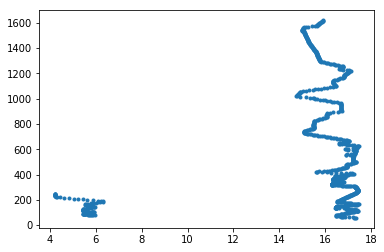

In [10]:
plt.plot(p_data[range(0,1000),0],p_data[range(0,1000),1],'.')
#plt.axis('equal')
plt.show()